<center>  

#**Desafio de Inteligência Artificial:**
#*Análise exploratória de dados sobre a pandemia de Covid-19*

</center>

 
|![covid](https://images.unsplash.com/photo-1584118624012-df056829fbd0?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=80)|  
|-|  
|<center>*Imagem retirada de <a href="https://unsplash.com/@cdc?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">CDC</a>, <a href="https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>*</center>|
 

<center>  

### Este [conjunto de dados](https://covidtracking.com/data/download) é parte do projeto **The COVID Tracking Project** e contém informações sobre a pandemia de COVID-19 nos Estados Unidos. Para mais detalhes sobre seu conteúdo acesse este [link](https://covidtracking.com/about-data/data-definitions).  




</center>



---

In [ ]:
# --- importando as bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arquivo = '/content/drive/MyDrive/all-states-history.csv'

In [ ]:
# --- Download do conjunto de dados
df = pd.read_csv(arquivo, sep=',', parse_dates=['date'], header=0)

# The COVID Tracking Project at The Atlantic
# Disponível em https://covidtracking.com/data/download/all-states-history.csv
# Descrição das colunas: https://covidtracking.com/about-data/data-definitions

!wget https://covidtracking.com/data/download/all-states-history.csv

--2021-11-17 03:53:14--  https://covidtracking.com/data/download/all-states-history.csv
Resolving covidtracking.com (covidtracking.com)... 54.241.68.193, 52.52.138.60, 2604:a880:2:d0::2082:a001, ...
Connecting to covidtracking.com (covidtracking.com)|54.241.68.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2738601 (2.6M) [text/csv]
Saving to: ‘all-states-history.csv’

all-states-history. 100%[===================>]   2.61M  7.29MB/s    in 0.4s    

2021-11-17 03:53:14 (7.29 MB/s) - ‘all-states-history.csv’ saved [2738601/2738601]



----
## **1. Utilize o pandas para ler o arquivo "all-states-history.csv" e exiba as 10 primeiras linhas do dataset**

In [ ]:
## Esperado
df.head(10)

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,NaN,NaN,NaN,0,NaN,NaN,1660758.0,NaN,2.0,56886.0,NaN,0,0,NaN,NaN,NaN,NaN,68693.0,NaN,NaN,0,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,2676.0,NaN,1931711.0,2087,NaN,NaN,NaN,1515.0,NaN,499819.0,392077.0,408,0,NaN,NaN,NaN,NaN,NaN,295690.0,NaN,0,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,NaN,141.0,2480716.0,3267,NaN,NaN,2480716.0,1533.0,65.0,324818.0,255726.0,165,0,NaN,NaN,NaN,81803.0,NaN,315517.0,NaN,0,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,2140.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,NaN,273.0,3073010.0,13678,NaN,NaN,NaN,NaN,143.0,826454.0,769935.0,1335,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
5,2021-03-07,CA,54124.0,NaN,258,NaN,NaN,NaN,4291.0,0,NaN,1159.0,NaN,0,NaN,NaN,NaN,NaN,NaN,3501394.0,3501394.0,3816,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,49646014.0,133186,NaN,NaN,NaN,NaN,NaN,0,49646014.0,133186
6,2021-03-07,CO,5989.0,5251.0,3,735.0,23904.0,23904.0,326.0,18,NaN,NaN,2199458.0,0,369995.0,NaN,NaN,NaN,NaN,436602.0,410976.0,840,0,63087.0,NaN,NaN,NaN,NaN,NaN,6415123.0,38163,6415123.0,38163,435053.0,NaN,NaN,NaN,2616541.0,6107,NaN,0
7,2021-03-07,CT,7704.0,6327.0,0,1377.0,NaN,NaN,428.0,0,NaN,NaN,NaN,0,NaN,NaN,6188566.0,NaN,NaN,285330.0,265709.0,0,0,NaN,22245.0,NaN,NaN,323284.0,NaN,NaN,0,6520366.0,0,NaN,396680.0,NaN,NaN,NaN,0,6520366.0,0
8,2021-03-07,DC,1030.0,NaN,0,NaN,NaN,NaN,150.0,0,NaN,38.0,NaN,0,NaN,NaN,NaN,NaN,16.0,41419.0,NaN,146,0,NaN,NaN,NaN,NaN,NaN,29570.0,1261363.0,5726,1261363.0,5726,NaN,NaN,NaN,NaN,441942.0,1149,NaN,0
9,2021-03-07,DE,1473.0,1337.0,9,136.0,NaN,NaN,104.0,0,NaN,13.0,545070.0,917,NaN,NaN,NaN,NaN,NaN,88354.0,83621.0,215,0,NaN,NaN,NaN,NaN,91873.0,NaN,1431942.0,5867,1431942.0,5867,NaN,NaN,NaN,NaN,633424.0,1132,NaN,0


 **2. Mostre de forma concisa o resumo dos dados do DataFrame **

In [ ]:
## Esperado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              20780 non-null  datetime64[ns]
 1   state                             20780 non-null  object        
 2   death                             19930 non-null  float64       
 3   deathConfirmed                    9422 non-null   float64       
 4   deathIncrease                     20780 non-null  int64         
 5   deathProbable                     7593 non-null   float64       
 6   hospitalized                      12382 non-null  float64       
 7   hospitalizedCumulative            12382 non-null  float64       
 8   hospitalizedCurrently             17339 non-null  float64       
 9   hospitalizedIncrease              20780 non-null  int64         
 10  inIcuCumulative                   3789 non-nul

In [ ]:
df.describe()


----
## **3. Qual é o  número total de casos positivos nos Estados Unidos?**

In [ ]:
## Esperado
df['positive'].sum()

3400891719.0

## **4. Qual a média da pessoas com teste viral negativo ?**

In [ ]:
## Esperado
df['negativeTestsViral'].mean()

1818574.3734076433

----
## **5. Qual é o estado com o maior número de pessoas atualmente hospitalizadas?**

In [ ]:
## Esperado
hospitalized_max = df.sort_values(by='hospitalizedCurrently',ascending=False)['state']
hospitalized_max.head(1)

3309    CA
Name: state, dtype: object

##**6.Informe a porcentagem do número de individuos que foram hospitalizados na UTI, que tiveram o caso confimado de COVID no estado CA.**

In [ ]:
## Esperado
total_UTI =df['inIcuCurrently'].sum()
total_Conf = df[df['state']=='CA']
total_Conf = total_Conf['inIcuCurrently'].sum()
porcentagem = (total_Conf/total_UTI)*100
print(f"Total de Individuos na UTI: {total_UTI}",f"\nTotal de Individuos na UTI, Confirmados da CA: {total_Conf}",f"\nA porcentagem foi:{porcentagem:.2f}% ")


Total de Individuos na UTI: 4184552.0 
Total de Individuos na UTI, Confirmados da CA: 668693.0 
A porcentagem foi:15.98% 


## **7.Apresente os 10 estados que tiveram o maior indice de mortes confirmadas do COVID 19.**

In [ ]:
## Esperado
death_max = df.groupby(['state']).agg({'deathConfirmed':'max'})
death_max = death_max.sort_values(by='deathConfirmed', ascending=False)
death_max.head(10)


,deathConfirmed
state,
NJ,21177.0
IL,20763.0
MA,16085.0
MI,15666.0
GA,15598.0
OH,14752.0
AZ,14403.0
IN,12310.0
NC,10169.0


## **8. Gere a matriz de correlação entre (hospitalizedIncrease) e (totalTestsAntibody).**


In [ ]:
## Esperado
matriz = df[['totalTestsAntibody','hospitalizedIncrease']]
matriz.corr()

,totalTestsAntibody,hospitalizedIncrease
totalTestsAntibody,1.000000,0.302069
hospitalizedIncrease,0.302069,1.000000


# **9. Gere a matriz de correlação utilizando o Seaborn heatmap de todos os dados.**

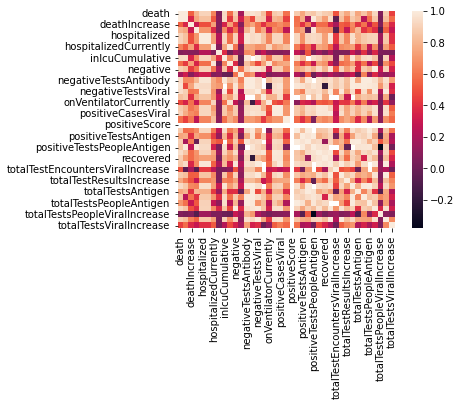

In [ ]:
## Esperado
sns.heatmap(df.corr(),square=True)

##  **10. Relacione o ("totalTestsAntigen") e ("recovered") de forma gráfica, utilizando o Seaborn, com o tipo "scatter"**.

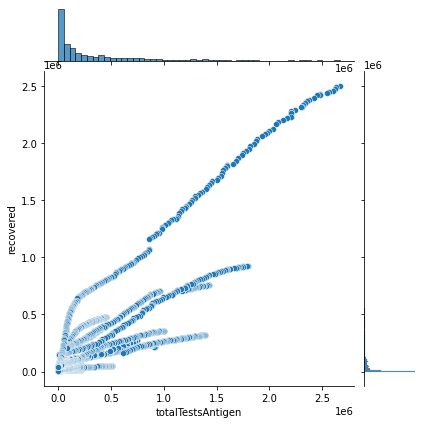

In [ ]:
## Esperado
sns.jointplot(x='totalTestsAntigen',y='recovered', data=df, kind='scatter')

# **11. Mostre, utilizando seaborn, a função de distribuição das mortes confirmadas do Covid 19.**

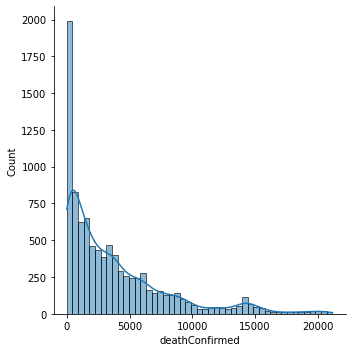

In [ ]:
## Esperado
sns.displot(df[('deathConfirmed')],kde =True)

## **12. Mostre de forma gráfica a contagem de pessoas por estado.**

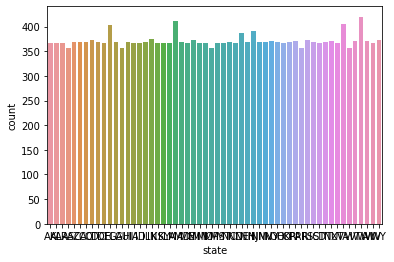

In [ ]:
## Esperado
sns.countplot(x='state',data=df)

## **13. Mostre um gráfico que exiba a evolução do número de mortes e do número de pessoas atualmente na ITU (icu) dos estados 'AL' e 'CA'.**

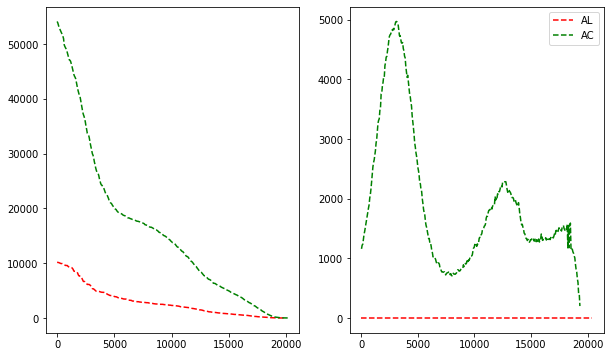

In [ ]:
## Esperado
al_death = df[df['state']=="AL"]['death']
ac_death = df[df['state']=="CA"]['death']
al_icu = df[df['state']=="AL"]['inIcuCurrently'].fillna(0)
ac_icu = df[df['state']=="CA"]['inIcuCurrently']
fig, axes= plt.subplots(1,2, figsize=(10, 6))

axes[0].plot(al_death,'r--')
axes[0].plot(ac_death,'g--')

axes[1].plot(al_icu,'r--',label ="AL")
axes[1].plot(ac_icu,'g--',label ="AC")
axes[1].legend(loc='upper right')

In [ ]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,2.078000e+04,20780.000000,20780.000000,20780.000000,2.078000e+04,20780.000000,20780.000000,2.078000e+04,2.078000e+04,20780.000000,20780.0,20780.000000,20780.000000,20780.000000,20780.000000,2.078000e+04,2.078000e+04,2.078000e+04,20780.000000,2.078000e+04,20780.000000,2.078000e+04,2.078000e+04,20780.000000,20780.000000,2.078000e+04,2.078000e+04,2.078000e+04,2.078000e+04
mean,3531.596824,1709.464004,24.790712,152.478008,5519.322666,5519.322666,993.427045,37.360780,352.678152,201.374013,5.424882e+05,3589.128874,10214.471078,8827.096343,4.396784e+05,35.674254,66.573821,1.636618e+05,1.224844e+05,1383.849519,0.0,3190.027238,3421.201155,1080.152117,769.440712,8.557094e+04,5.443645e+04,6.802086e+05,5578.147064,2.169466e+06,17508.388210,3.765814e+04,5.085726e+04,17514.433253,8085.662079,4.271031e+05,2.739554e+03,1.609861e+06,1.296143e+04
std,6194.636505,3370.488127,60.162742,382.082440,10750.201894,10750.201894,1933.097380,208.237151,1119.533486,479.571454,1.149762e+06,11577.190442,62571.509544,58831.981078,1.453194e+06,175.914129,156.890271,3.256792e+05,2.895790e+05,3023.558742,0.0,13639.818396,16913.591602,8127.322884,6047.092316,2.508431e+05,1.670075e+05,2.801337e+06,21253.609858,4.423038e+06,33586.022461,1.187842e+05,2.064328e+05,77140.921218,47823.119169,1.056471e+06,1.621900e+04,3.862964e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,0.000000,0.000000,0.000000,-12257.000000,0.000000,0.000000,0.000000e+00,-968686.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-7757.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-16946.000000,0.000000e+00,-130545.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.266000e+03,0.000000e+00,65.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9.682300e+04,1205.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,982.000000,0.000000,6.000000,0.000000,462.000000,462.000000,370.000000,0.000000,0.000000,19.000000,3.730150e+04,141.500000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.486100e+04,1.317800e+04,435.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.520000e+02,0.000000e+00,0.000000,6.424245e+05,6125.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.889350e+05,1.896500e+03
75%,4159.000000,1921.000000,24.000000,114.000000,6411.000000,6411.000000,1051.000000,36.000000,0.000000,209.000000,5.322208e+05,3916.000000,0.000000,0.000000,0.000000e+00,0.000000,67.000000,1.756140e+05,1.208195e+05,1335.250000,0.0,0.000000,0.000000,0.000000,0.000000,4.201375e+04,3.102675e+04,0.000000e+00,0.000000,2.243481e+06,19086.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,3.330730e+05,2.478000e+03,1.464490e+06,1.244100e+04
max,54124.000000,21177.000000,2559.000000,2594.000000,82237.000000,

In [ ]:
df.isnull().sum()

date                                    0
state                                   0
death                                 850
deathConfirmed                      11358
deathIncrease                           0
deathProbable                       13187
hospitalized                         8398
hospitalizedCumulative               8398
hospitalizedCurrently                3441
hospitalizedIncrease                    0
inIcuCumulative                     16991
inIcuCurrently                       9144
negative                             7490
negativeIncrease                        0
negativeTestsAntibody               19322
negativeTestsPeopleAntibody         19808
negativeTestsViral                  15756
onVentilatorCumulative              19490
onVentilatorCurrently               11654
positive                              188
positiveCasesViral                   6534
positiveIncrease                        0
positiveScore                           0
positiveTestsAntibody             

In [ ]:
#Preenchendo missing values
df[['death', 'deathConfirmed', 'deathProbable', 'hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently', 'inIcuCumulative', 'hospitalizedCurrently', 'inIcuCumulative', 'inIcuCurrently', 'negative','negativeTestsAntibody', 'negativeTestsPeopleAntibody', 'negativeTestsViral', 'onVentilatorCumulative','onVentilatorCurrently', 'positive', 'positiveCasesViral', 'positiveTestsAntibody','positiveTestsAntigen', 'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen', 'positiveTestsViral', 'recovered', 'totalTestEncountersViral', 'totalTestResults', 'totalTestsAntibody', 'totalTestsAntigen', 'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen', 'totalTestsPeopleViral','totalTestsViral']] = df[['death', 'deathConfirmed', 'deathProbable', 'hospitalized', 'hospitalizedCumulative', 'hospitalizedCurrently', 'inIcuCumulative', 'hospitalizedCurrently', 'inIcuCumulative', 'inIcuCurrently', 'negative','negativeTestsAntibody', 'negativeTestsPeopleAntibody', 'negativeTestsViral', 'onVentilatorCumulative','onVentilatorCurrently', 'positive', 'positiveCasesViral', 'positiveTestsAntibody','positiveTestsAntigen', 'positiveTestsPeopleAntibody', 'positiveTestsPeopleAntigen', 'positiveTestsViral', 'recovered', 'totalTestEncountersViral', 'totalTestResults', 'totalTestsAntibody', 'totalTestsAntigen', 'totalTestsPeopleAntibody', 'totalTestsPeopleAntigen', 'totalTestsPeopleViral','totalTestsViral']].fillna(0)

In [ ]:
df.isnull().sum()

date                                0
state                               0
death                               0
deathConfirmed                      0
deathIncrease                       0
deathProbable                       0
hospitalized                        0
hospitalizedCumulative              0
hospitalizedCurrently               0
hospitalizedIncrease                0
inIcuCumulative                     0
inIcuCurrently                      0
negative                            0
negativeIncrease                    0
negativeTestsAntibody               0
negativeTestsPeopleAntibody         0
negativeTestsViral                  0
onVentilatorCumulative              0
onVentilatorCurrently               0
positive                            0
positiveCasesViral                  0
positiveIncrease                    0
positiveScore                       0
positiveTestsAntibody               0
positiveTestsAntigen                0
positiveTestsPeopleAntibody         0
positiveTest

In [ ]:
df.describe()

,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
count,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,20780.000000,2.078000e+04,20780.000000,20780.000000,20780.000000,2.078000e+04,20780.000000,20780.000000,2.078000e+04,2.078000e+04,20780.000000,20780.0,20780.000000,20780.000000,20780.000000,20780.000000,2.078000e+04,2.078000e+04,2.078000e+04,20780.000000,2.078000e+04,20780.000000,2.078000e+04,2.078000e+04,20780.000000,20780.000000,2.078000e+04,2.078000e+04,2.078000e+04,2.078000e+04
mean,3531.596824,1709.464004,24.790712,152.478008,5519.322666,5519.322666,993.427045,37.360780,352.678152,201.374013,5.424882e+05,3589.128874,10214.471078,8827.096343,4.396784e+05,35.674254,66.573821,1.636618e+05,1.224844e+05,1383.849519,0.0,3190.027238,3421.201155,1080.152117,769.440712,8.557094e+04,5.443645e+04,6.802086e+05,5578.147064,2.169466e+06,17508.388210,3.765814e+04,5.085726e+04,17514.433253,8085.662079,4.271031e+05,2.739554e+03,1.609861e+06,1.296143e+04
std,6194.636505,3370.488127,60.162742,382.082440,10750.201894,10750.201894,1933.097380,208.237151,1119.533486,479.571454,1.149762e+06,11577.190442,62571.509544,58831.981078,1.453194e+06,175.914129,156.890271,3.256792e+05,2.895790e+05,3023.558742,0.0,13639.818396,16913.591602,8127.322884,6047.092316,2.508431e+05,1.670075e+05,2.801337e+06,21253.609858,4.423038e+06,33586.022461,1.187842e+05,2.064328e+05,77140.921218,47823.119169,1.056471e+06,1.621900e+04,3.862964e+06,3.749509e+04
min,0.000000,0.000000,-201.000000,0.000000,0.000000,0.000000,0.000000,-12257.000000,0.000000,0.000000,0.000000e+00,-968686.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,-7757.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,-16946.000000,0.000000e+00,-130545.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.043744e+06,0.000000e+00,-1.154583e+06
25%,118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.266000e+03,0.000000e+00,65.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,9.682300e+04,1205.750000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,982.000000,0.000000,6.000000,0.000000,462.000000,462.000000,370.000000,0.000000,0.000000,19.000000,3.730150e+04,141.500000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,4.486100e+04,1.317800e+04,435.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.520000e+02,0.000000e+00,0.000000,6.424245e+05,6125.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,1.889350e+05,1.896500e+03
75%,4159.000000,1921.000000,24.000000,114.000000,6411.000000,6411.000000,1051.000000,36.000000,0.000000,209.000000,5.322208e+05,3916.000000,0.000000,0.000000,0.000000e+00,0.000000,67.000000,1.756140e+05,1.208195e+05,1335.250000,0.0,0.000000,0.000000,0.000000,0.000000,4.201375e+04,3.102675e+04,0.000000e+00,0.000000,2.243481e+06,19086.500000,0.000000e+00,0.000000e+00,0.000000,0.000000,3.330730e+05,2.478000e+03,1.464490e+06,1.244100e+04
max,54124.000000,21177.000000,2559.000000,2594.000000,82237.000000,